# **Business Case: Yulu - Hypothesis Testing**

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

**Bussiness Problem**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:
Which variables are significant in predicting the demand for shared electric 

*  Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*  How well those variables describe the electric cycle demands


In [ ]:
# Loading the YULU dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2023-05-16 02:48:05--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 65.8.55.208, 65.8.55.115, 65.8.55.79, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|65.8.55.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.05s   

2023-05-16 02:48:05 (13.1 MB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



In [ ]:
#importing the python libraries and reading the dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bike_sharing.csv?1642089089")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.**

In [ ]:
# Shape of dataset
df.shape

(10886, 12)

In [ ]:
# Checking the characterstics of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Observations :

Datatype of following attributes needs to changed to proper data type :

datetime - to datetime

season, holiday, workingday, weather - to categorical

In [ ]:
# converting numerical to categorical
df['datetime'] = pd.to_datetime(df['datetime']) #converting to datatime format
cat_cols = ['season' , 'holiday' , 'workingday' ,'weather'] #list of categorical columns
for i in cat_cols:
  df[i] = df[i].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
#checking for missing values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# Checking the characteristics of the data
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Checking the characteristics of the categorical data
df.describe(include = 'object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [ ]:
# Understanding the distribution of categorical variables
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable   value          
holiday    0      0.971431
           1      0.028569
season     1      0.246739
           2      0.251056
           3      0.251056
           4      0.251148
weather    1      0.660665
           2      0.260334
           3      0.078909
           4      0.000092
workingday 0      0.319125
           1      0.680875

In [ ]:
#minimum and maximum date
print('The minimum date in the given dataset :' , df['datetime'].min())
print('The maximum date in the given dataset :' , df['datetime'].max())

The minimum date in the given dataset : 2011-01-01 00:00:00
The maximum date in the given dataset : 2012-12-19 23:00:00


**Intial Observations**


1.   There are 10886 rows in data and 12 different features

2.   There are no missing values in the dataset

3.   The numercial attitributes temp, atemp, humudity, windspeed might not have outliers as thier mean and median are almost same

4.  Casual and Registered seem to have outliers as theier mean and median are very far to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes

5.  Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.

6.  There are 4 unique seasons and weather in the dataset with 24.6% of electric cycle being rented in Fall season and 66% of electrice vehhicles being rented  on Clear, Few cloud or partly cloudy days

7.  Least number of electric cycles where rented during Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow or Fog which is almost zero

8.  Most of the cycles where rented on working days i.e around 68% than non-working days may be people prefer to rest on non-working days

9. There is no much difference of cycles rented on season 2,3, and 4 which almost 25%




**Univariate Analysis**

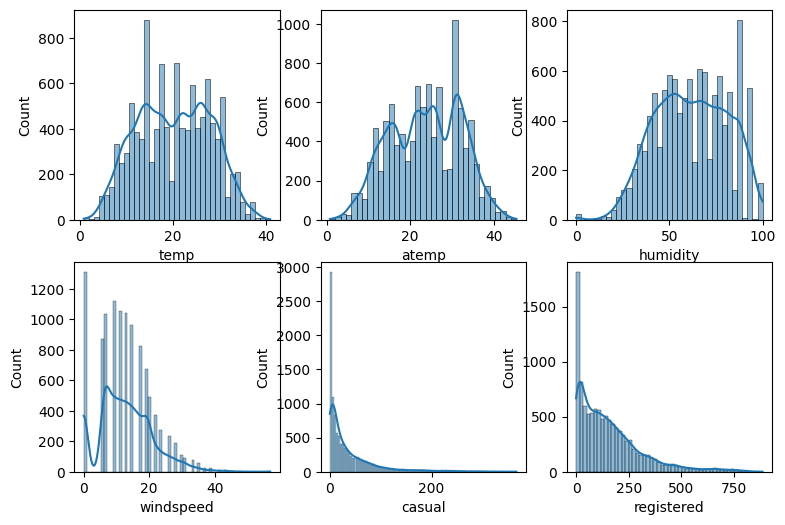

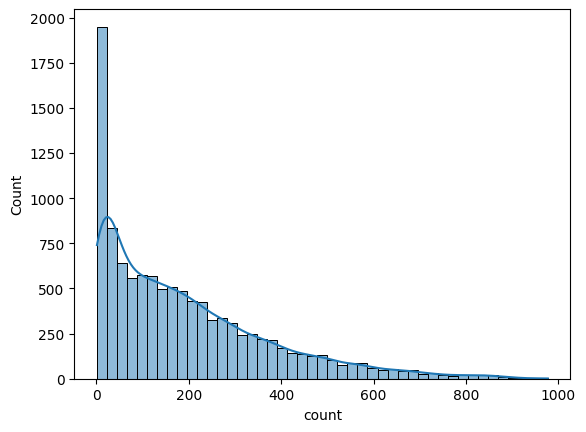

In [ ]:
# understanding the distribution for numerical variables using histogram
num_cols =  ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

i = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[i]], ax=axis[row, col], kde=True)
        i += 1
        
plt.show()
sns.histplot(df[num_cols[-1]], kde=True) 
plt.show()

Observations:

1. The columns : temp, atemp and humidity looks like they follow Normal Distribution.

2. The columns : casual ,registered and count looks like they follow Log-Normal Distribution and are right skewed.

3. The windspeed follows Binomial Distribution.

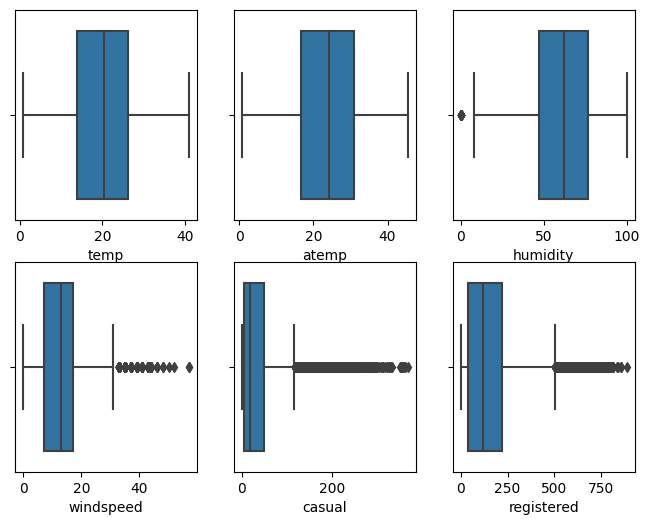

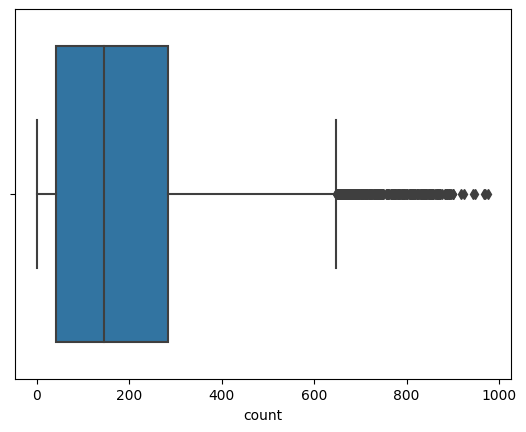

In [ ]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

i = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[i]], ax=axis[row, col])
        i += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]]) 
plt.show()

Observations:
   Humidity, Casual, Registered and Count have outliers in the dataset




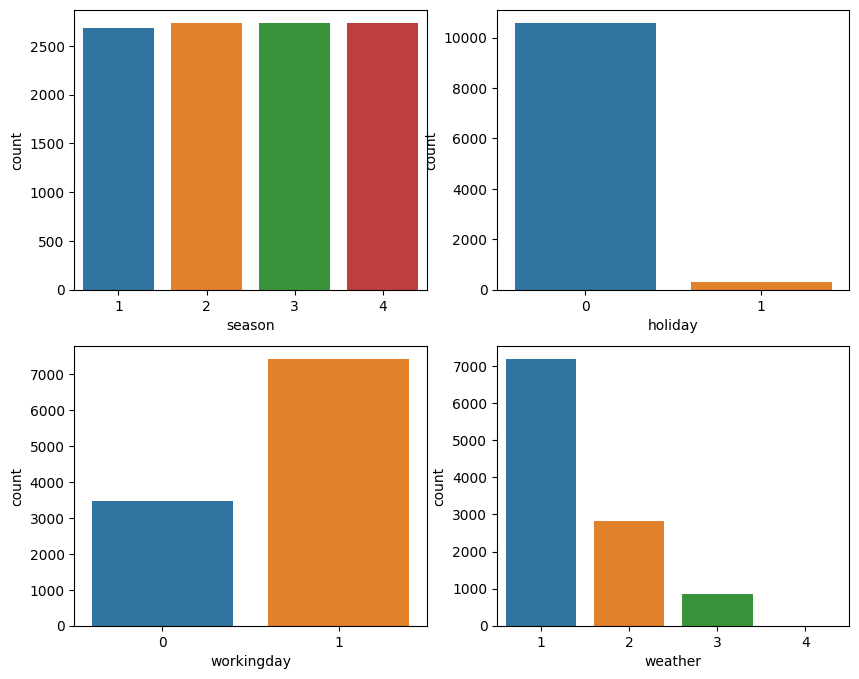

In [ ]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

i = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[i], ax=axis[row, col])
        i += 1
       
plt.show()

Observations:

1.   Most of the cycles where rented on working days probably because it is an easy mode of transport

2.   Looks like all season have almost equal no of rented cycles.

3.   Whenever its a holiday ,cycles seem to be more in demand.

4.   Most cycles are rented on days with clear sky or partly cloudy days

5.  The demand for cycles on extreme weather conditions like heavy rainy days with thunderstorm, mist, snow or fog is very very less.


**Bivariate Analysis**

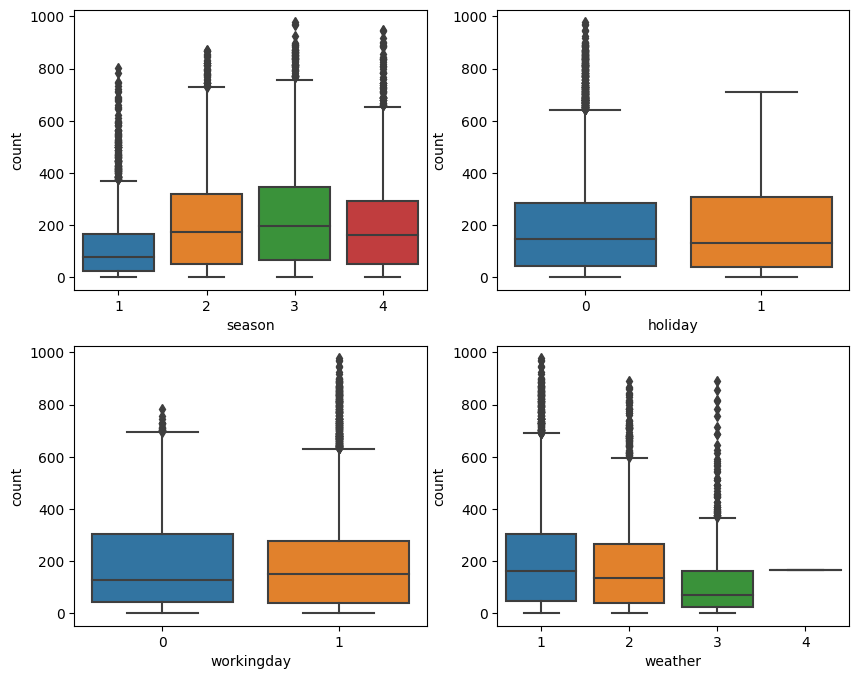

In [ ]:
#Relationships between variables such as workday and count, season and count, weather and count
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

i = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[i], y='count', ax=axis[row, col])
        i += 1
        
plt.show()

Observations:


1.   If its an holidays then more cycles are rented.
2.   Fall(3) and Summer(2) seem to be have more demand for shared electric cycles as compared to other seasons

3.  It is also clear from the above plot that whenever it is a holiday or weekend, slightly more bikes were rented.
 
4.  Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

5.  All the four variables have outliers


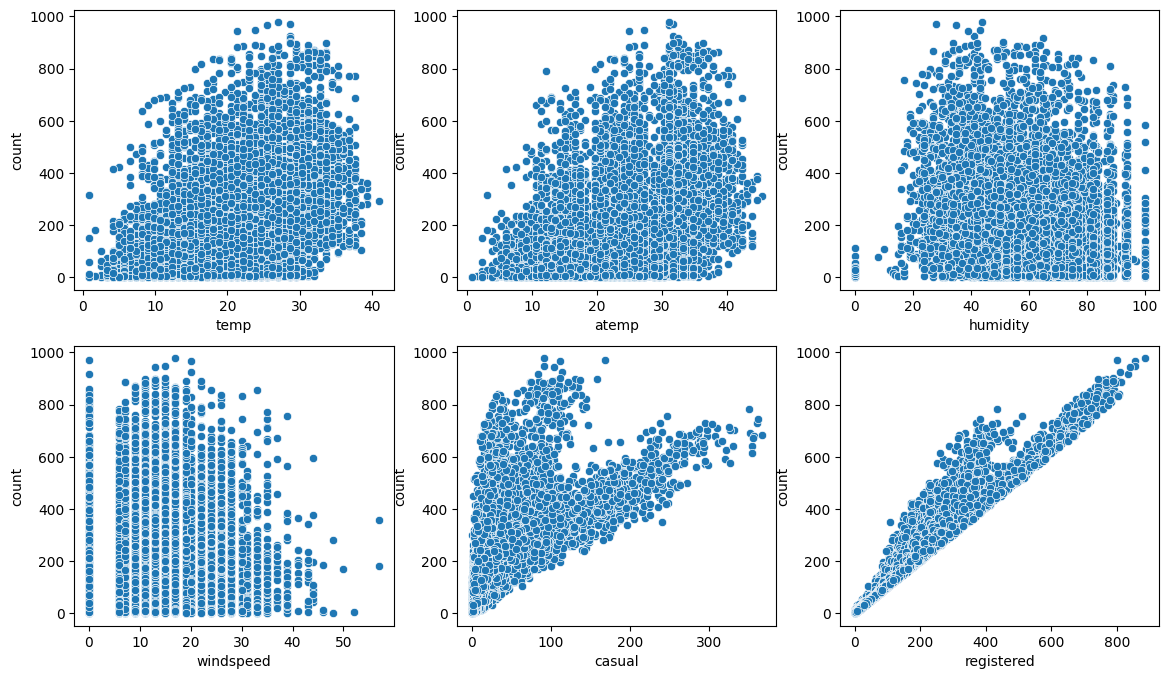

In [ ]:
# plotting numerical variables against count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

i = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[i], y='count', ax=axis[row, col])
        i += 1
        
plt.show()

Observations:

1.   Whenever the humidity is less than 20, number of bikes rented is very very low
2.  Whenever the temperature is less than 10, number of bikes rented is less.

3.  Whenever the windspeed is greater than 35, number of bikes rented is less.

4.  We can see from the above graph that registered variable follows a perfect linear trend. Casual is seen following linear relation with count variable

5.  All the 4 categorical variables have outliers.




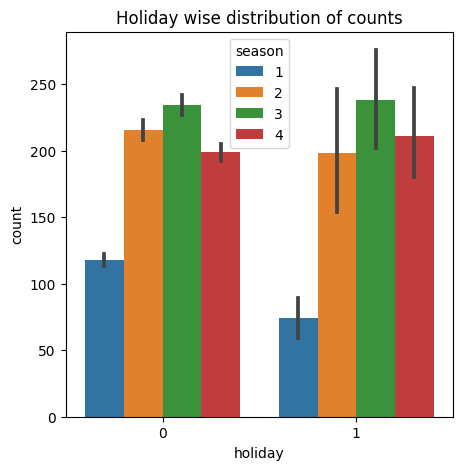

In [77]:
#Barplot for Holiday distribution of counts

fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='holiday',y='count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

In [ ]:
df.corr()['count']

<ipython-input-19-c6e37b628cdf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']


temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

<ipython-input-20-bcf85aa0fddd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


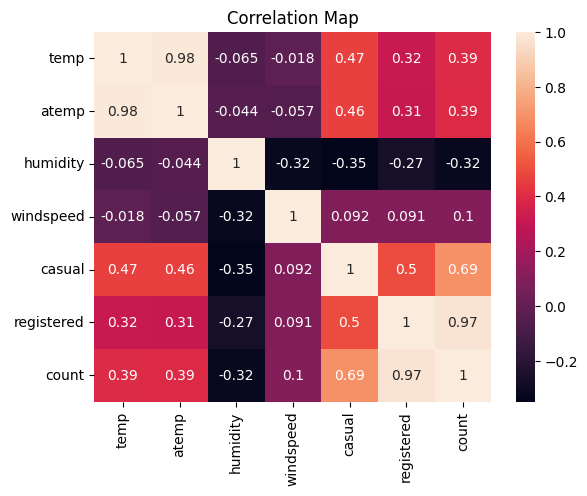

In [ ]:
# heat plot for understanding of correlation between numerical variables
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Map")
plt.show()

The negative value of humidity indicates that count variable and humidity are highly correlated in negative direction and other  numerical variables are positively correlated with count variable. 

# **Hypothesis Testing**

**1 )  2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**




In [ ]:
# importing the scipy library for the hypothesis testing
import scipy.stats as stats

In [ ]:
#Two sample groups for ttest
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values
print("data_group1 : " , data_group1)
print("data_group2 : " , data_group2)

data_group1 :  [ 16  40  32 ... 106  89  33]
data_group2 :  [  5   2   1 ... 168 129  88]


Assumptions for ttest:


1.   Whether the two sample data groups are independent? YES

2.   Whether the data elements in respective groups follow any normal distribution 

3.  Homogeneity assumption: Whether the given two samples groups have similar variances



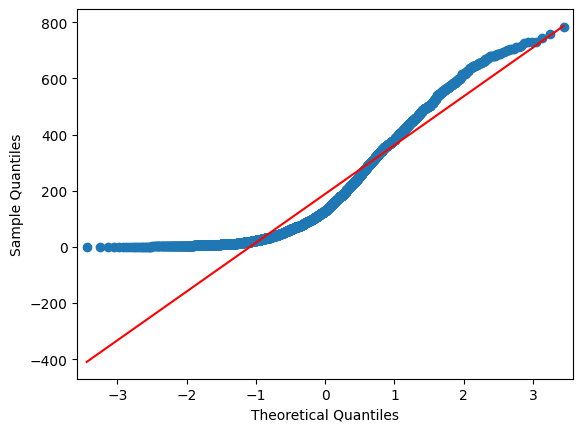

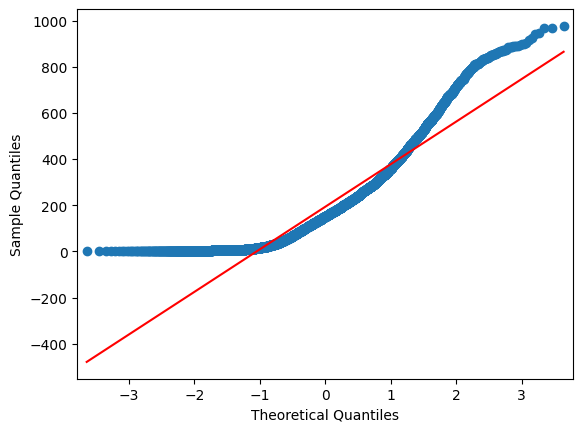

In [ ]:
##Checking for normal distribution using qqplot
import statsmodels.api as sm
sm.qqplot(data_group1 , line ='s')
sm.qqplot(data_group2 , line ='s')
plt.show()

Both the datagroups do not follow a perfect normal distribution this may be because of the outliers in the data.

This is a two- tail test.

Now lets check whether the variance are equal or different using LEVENE'S TEST for the above two data_groups. Let the choosen significnce level be 0.05 (alpha)

In [45]:
#checking for the equal variance using Levene's Test

# H0 : Variance of both the datagroups are equal
# H1 : Variance of datagroups are different

test_stat , p_value = stats.levene(data_group1, data_group2, center='mean')
print("Levene's Test Statistics : ", test_stat)
print(  "p_value = ",p_value )

if p_value < 0.05:
  print ("Reject H0")
  print (" Variance are different")
else :
  print("Fail to reject H0")
  print("Variance are equal")

Levene's Test Statistics :  0.9606739790242115
p_value =  0.3270389131557905
Fail to reject H0
Variance are equal


Thus, we can proceed to perform the 2 SAMPLE T-TEST with equal variances. The two hypotheses for this particular two sample t-test are as follows

In [ ]:
#ttest to check wheather Working Day has effect on number of electric cycles rented

#H0 : Working day has no effect on the number of cycles being rented.
#H1 : Working Day has effect on number of electric cycles rented

test_stat , p_value = stats.ttest_ind(data_group1, data_group2, equal_var=True)
print(  "p_value = ",p_value  )

if p_value < 0.05:
  print ("Reject H0")
  print (" Working Day has effect on number of electric cycles rented ")
else :
  print("Fail to reject H0")
  print("Working day has no effect on the number of cycles being rented")

p_value =  0.22644804226361348
Fail to reject H0
Working day has no effect on the number of cycles being rented


RESULT : Since p-value is greater than 0.05 so we can not reject the Null hypothesis.

 We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

**2 ) No. of cycles rented similar or different in different weather**


In [ ]:
# Creating sample groups weather
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values


As there are 4 sample data_groups , we use Annova testing

 Assumptions for Annova :


1.   Whether the four sample data groups are independent? YES

2.   Whether the data elements in respective groups follow any normal distribution 

3.  Homogeneity assumption: Whether the given two samples groups have similar variances



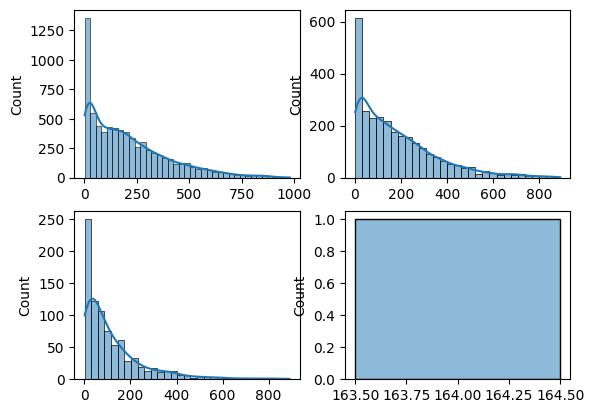

In [80]:
# 1) Checking for normal distribution using histogram
plt.subplot(2,2,1)
sns.histplot(gp1 , kde=True)

plt.subplot(2,2,2)
sns.histplot(gp2 ,kde=True)

plt.subplot(2,2,3)
sns.histplot(gp3,kde=True)

plt.subplot(2,2,4)
sns.histplot(gp4 , kde=True)
plt.show()

Both the datagroups do not follow a lognormal o right skewed distribution.

This is a two- tail test.

Now lets check whether the variance are equal or different using LEVENE'S TEST for the above four data_groups. Let the choosen significnce level be 0.05

In [78]:
#checking for the equal variance using Levene's Test

# H0 : Variance of all the datagroups are equal
# H1 : Variance of all the datagroups are different

test_stat , p_value = stats.levene(gp1,gp2,gp3,gp4)
print("Levene's Test Statistics : ", test_stat)
print(  "p_value = ",p_value )

if p_value < 0.05:
  print ("Reject H0")
  print ("Variance are different")
else :
  print("Fail to reject H0")
  print("Variance are equal")

Levene's Test Statistics :  54.85106195954556
p_value =  3.504937946833238e-35
Reject H0
Variance are different


As p_value is greater than 0.05 we reject Null Hypothesis and Variance are different ,this may be because of p-value for atleast one weather is different.

Lets perform ANNOVA Testing

In [53]:
#ttest to check wheather No. of cycles rented similar or different in different weather

#H0 : Number of cycles rented is similar in different weather.
#H1 : Number of cycles rented is not similar in different weather 

test_stat , p_value = stats.f_oneway(gp1, gp2, gp3, gp4)
print(  "p_value = ",p_value  )
if p_value < 0.05:
  print ("Reject H0")
  print ("Number of cycles rented is not similar in different weather ")
else :
  print("Fail to reject H0")
  print("Number of cycles rented is similar in different weather")


p_value =  5.482069475935669e-42
RESULT 
Reject H0
Number of cycles rented is not similar in different weather 


RESULT : Since p-value is less than 0.05 so we reject the Null hypothesis. We have sufficient evidence to say that Number of cycles rented is not similar in different weather this may be due to extreme weather condition people tend to avoid going out and hence rented electric cycles are less.

**3 ) No. of cycles rented similar or different in different seasons**

In [51]:
# Creating sample groups for different seasons
gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

As there are 4 sample data_groups , we use Annova testing

 Assumptions for Annova :


1.   Whether the four sample data groups are independent? YES

2.   Whether the data elements in respective groups follow any normal distribution 

3.  Homogeneity assumption: Whether the given two samples groups have similar variances

<Axes: ylabel='Count'>

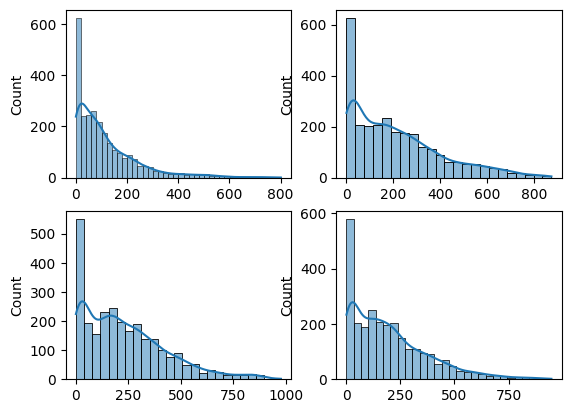

In [52]:
# 1) Checking for normal distribution using histogram
# histplot for data_groups
plt.subplot(2,2,1)
sns.histplot(gp5 , kde=True)

plt.subplot(2,2,2)
sns.histplot(gp6 ,kde=True)

plt.subplot(2,2,3)
sns.histplot(gp7,kde=True)

plt.subplot(2,2,4)
sns.histplot(gp8 , kde=True)

Both the datagroups do not follow a lognormal o right skewed distribution.

This is a two- tail test.

Now lets check whether the variance are equal or different using LEVENE'S TEST for the above four data_groups. Let the choosen significnce level be 0.05

In [79]:
#checking for the equal variance using Levene's Test

# H0 : Variance of all the datagroups are equal
# H1 : Variance of all the datagroups are different

test_stat , p_value = stats.levene(gp5, gp6, gp7 ,gp8)
print("Levene's Test Statistics : ", test_stat)
print(  "p_value = ",p_value )

if p_value < 0.05:
  print ("Reject H0")
  print ("Variance are different")
else :
  print("Fail to reject H0")
  print("Variance are equal")

Levene's Test Statistics :  187.7706624026276
p_value =  1.0147116860043298e-118
Reject H0
Variance are different


As p_value is greater than 0.05 we reject Null Hypothesis and Variance are different ,this may be because of p-value for atleast one weather is different.

Lets perform ANNOVA Testing


In [55]:
#Annova to check wheather No. of cycles rented similar or different in different seasons
#H0 :Number of cycles rented is similar in all 4 seasons.
#H1 :Number of cycles rented is different in all 4 seasons.
test_statistics , p_value = stats.f_oneway(gp5, gp6, gp7, gp8)
print(  "p_value = ",p_value  )

if p_value < 0.05:
  print ("Reject H0")
  print ("Number of cycles rented is different in all 4 seasons")
else :
  print("Fail to reject H0")
  print("Number of cycles rented is similar in all 4 seasons")

p_value =  6.164843386499654e-149
Reject H0
Number of cycles rented is different in all 4 seasons


RESULT : As p-value is less than 0.05 we reject Null Hypothesis.This implies that Number of cycles rented is not similar in different weather and season conditions.

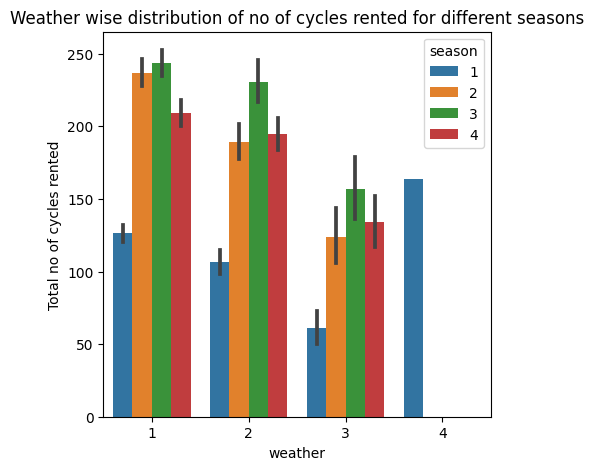

In [76]:
#Barplot for distribution of counts with respect to weather and season 

fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='weather',y='count',hue='season')
ax.set_title('Weather wise distribution of no of cycles rented for different seasons')
plt.ylabel("Total no of cycles rented")
plt.show()

**4) Weather is dependent on season**

As we are checking dependence of two categorical variables we use CHI-SQUARE testing.




In [62]:
#importing chi-square  contingency
from scipy.stats import chi2_contingency

#defining the cross tab for both categorical variables
cross_tab = pd.crosstab(df['season'], df['weather'])
cross_tab

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [61]:
#Chi-square test to check the dependence of season and weather

#H0 :Weather is independent of the season 
#H1 :Weather is dependent of the season

test_stat, p_value, dof, expected = chi2_contingency(cross_tab)

print("Test Statistic :" ,test_stat)
print("Degree of Freedom :" , dof)
print("Expected Observations :" , expected)
print( "p_value = ",p_value  )

if p_value < 0.05:
  print ("Reject H0")
  print ("Weather is dependent of the season")

else :
  print("Fail to reject H0")
  print("Weather is independent of the season")

Test Statistic : 49.158655596893624
Degree of Freedom : 9
Expected Observations : [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
p_value =  1.549925073686492e-07
Reject H0
Weather is dependent of the season


RESULT : Since p-value is less than 0.05 so we reject the Null hypothesis. We have sufficient evidence to say that weather and season are dependent on each other.



**Inference from the analysis**


1.   With a significance level of 0.05, workingday has no effect on the number of bikes being rented

2.   With a significance level of 0.05, no of cycles rented are not similar for different seasons and weather

3.   Weather and Seasons are dependent on each other.

4.   Whenever it is holiday more shared electric cycles from Yulu are rented.

5.   There are peak in demand of no of cycles rented during Summer and Fall season.

6.   People tend to use rented cycles on their working days as it help it is faster than car or buses.

7.   There are less number of cycles rented on days with temperature less than 10 degree celsicus.

8.   Less number of cycles are rented on days with humidity less than 18.

9.   As the windspeed becomes more than 35 , less number of cycles are rented as too windy days makes it uncomfortable to commute via a cycle 

10.  Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented

11.  It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented

12. Demand for the rented cycles depends on temperature,humidity,season,weather conditions ,holidays and working days.

13. 68% of cycles where rented on working days i.e on non-working days people prefer to rest or use their own vehicles.






**Recommendation**


1. Demands for rented cycles is more during summer and fall seasons , so the company needs to stock more number of cycles.

2. Demands for rented cycles is more on working days(neither weekend nor holidays). So the company needs to stock more number of cycles to meet the demand.

3. In very low humid days, company should have less bikes in the stock to be rented.

4. Whenever temprature is less than 10 or in very cold days, company should have less cycles in stock.

5. Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
 
6. Using date and time we can analyze the peak hours and depending on that we can understand when to increase the stock.

7. Easy accessibility of shared rented cycles can also help in profit of the company

